In [1]:
from aurelio.dataset_analyser import *
from statistics import mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from os.path import realpath

In [2]:
with open(realpath("data/dataset.json")) as file:
    dataset = json.loads(file.read())

context, question, answers = get_dataset_word_count(dataset)

dfs = {
    "context_word_count": pd.DataFrame({"word_amount": context}),
    "question_word_count": pd.DataFrame({"word_amount": question}),
    "answer_word_count": pd.DataFrame({"word_amount": [mean(answer) for answer in answers]}),
    "answer_count_per_question": pd.DataFrame({"answer_amount": [len(answer) for answer in answers]}),
    "context_question_answer_word_count_mean": pd.DataFrame({
        "context": [mean(context)],
        "question": [mean(question)],
        "answer": [mean([mean(answer) for answer in answers])]
    })
}

In [95]:
from pprint import pprint
pprint(len(dataset["data"]))

39


## Quantidade de palavras por pergunta x Média de palavras por resposta de cada pergunta

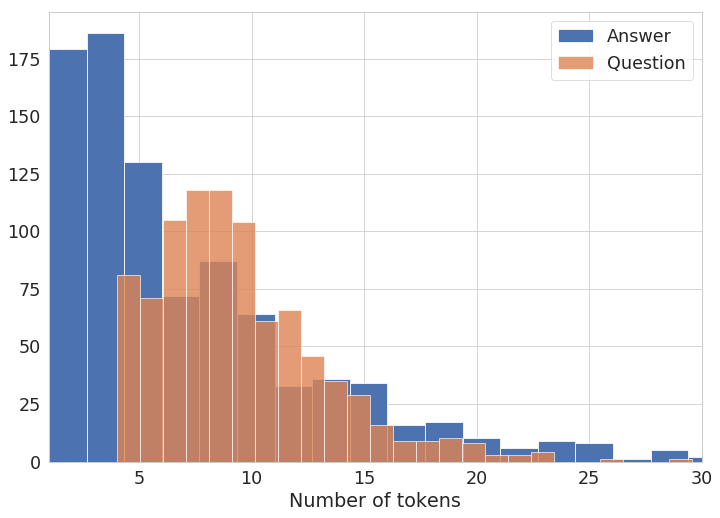

In [64]:
# sns.set()

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("whitegrid")

sns.set_context("paper", font_scale=2)


# with sns.color_palette("dark"):
p = sns.distplot(dfs["answer_word_count"], 
                 kde=False, 
                 label="Answer",
                 axlabel="Number of tokens", 
                 hist_kws={'alpha':1})

p = sns.distplot(dfs["question_word_count"], 
                 kde=False, 
                 label="Question",
                 ax=p,
                 hist_kws={'alpha':0.8})
p.set(xlim=(1,30))
p.legend()

p

## Quantidade de palavras por contexto

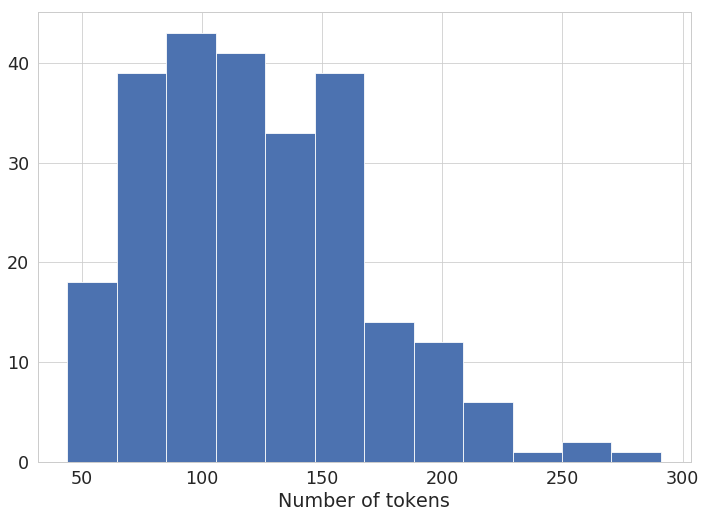

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)

sns.distplot(dfs["context_word_count"], axlabel="Number of tokens", kde=False, hist_kws={"alpha":1})

## Quantidade de respostas por pergunta

1    470
2    226
3    197
4      7
Name: answer_amount, dtype: int64

900

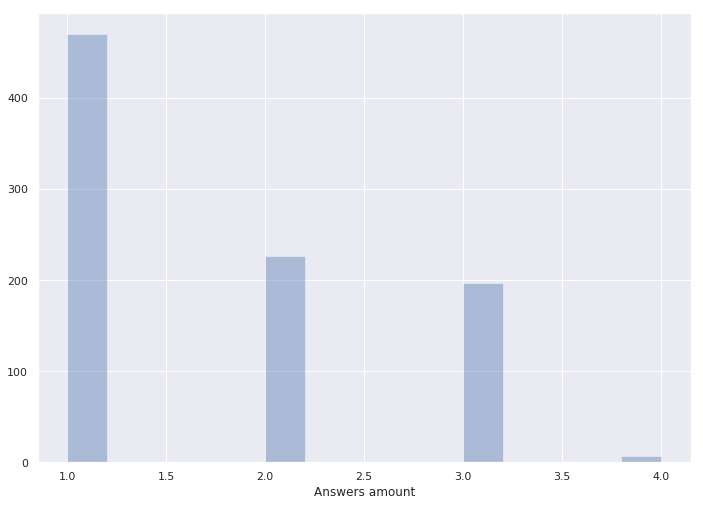

In [82]:
display(dfs["answer_count_per_question"].iloc[:,0].value_counts())
display(dfs["answer_count_per_question"].iloc[:,0].value_counts().sum())
sns.set()
sns.distplot(dfs["answer_count_per_question"], axlabel="Answers amount", kde=False)

## Answer Type Distribution

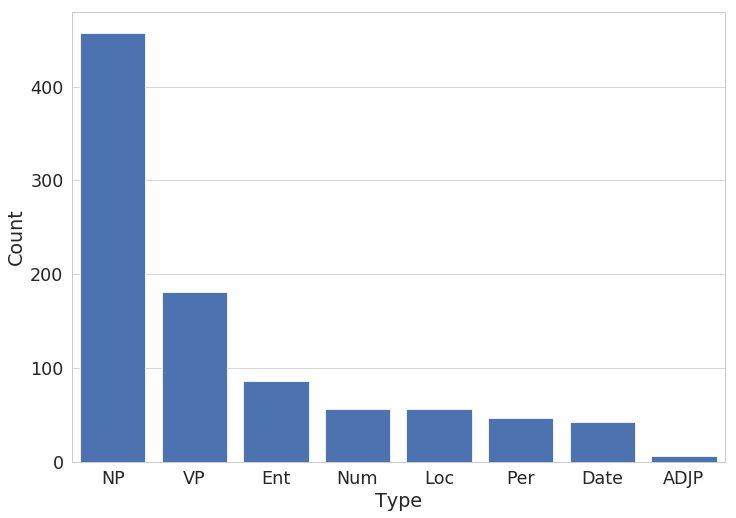

In [124]:
d = {
  "NP": 457,
  "VP": 181,
  "Ent": 86,
  "Num": 56,
  "Loc": 56,
  "Per": 46,
  "Date": 42,
  "ADJP": 6
}

type_count = list(zip(*list(d.items())))

df = pd.DataFrame.from_dict({"Type": type_count[0], "Count": type_count[1]})

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns.barplot(x="Type", y="Count", data=df, color=sns.color_palette()[0], saturation=1)